# Восстановление золота из руды

<div class="alert alert-info">
Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
<br>
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 
<br>
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
<br>
Нужно:
<br>
1. Подготовить данные;
<br>
2. Провести исследовательский анализ данных;
<br>
3. Построить и обучить модель.
</div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random 
from numpy.random import RandomState
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, 
    f1_score, 
    mean_squared_error, 
    mean_absolute_error,
    mean_absolute_percentage_error,
    roc_auc_score,
    roc_curve
)
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info">
Откроем данные
</div>

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


<div class="alert alert-info">
Проверим, что эффективность обогащения рассчитана правильно. 
    <br>
Вычислим её на обучающей выборке для признака rougher.output.recovery. 
    <br>
Найдём MAE между вашими расчётами и значением признака.</div>

In [6]:
df_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [7]:
rougher_output_recovery = df_train['rougher.output.recovery']

<div class="alert alert-info">
доля золота в сырье/концентрате до флотации - rougher.input.feed_au
    <br>
доля золота в отвальных хвостах после флотации - rougher.output.tail_au
    <br>
доля золота в концентрате после флотации - rougher.output.concentrate_au
</div>

In [8]:
rougher_output_recovery_calc = ((df_train['rougher.output.concentrate_au'] * 
                               (df_train['rougher.input.feed_au'] - 
                                df_train['rougher.output.tail_au'])) / (df_train['rougher.input.feed_au'] * 
                (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))) * 100
rougher_output_recovery_calc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [9]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], rougher_output_recovery_calc)
mae

9.73512347450521e-15

<div class="alert alert-info">
MAE стремиться к нулю, значит в среднем посчитанные значения имеют нулевую ошибку (разницу между посчитанным и истинным значением). Соответственно мы можем сделать вывод что наши расчеты правильные и целевой признак рассчитан верно.
</div>

<div class="alert alert-info">Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?</div>

In [10]:
set_difference = set(df_train.columns).symmetric_difference(set(df_test.columns))
set_difference

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-info">
Эти признаки нам недоступны во время прогнозирования - концентрация веществ на разных этапах флотации. А в тестовой выборке находятся те признаки, которые нам известны на момент начала процесса. Поэтому при обучении будем использовать только те признаки, которые есть в тесте. У нас будет две модели: одна для грубой очистки, вторая для финальной. Признаки будем использовать одни и те же для обеих моделей.</div>

<div class="alert alert-info">Проведём предобработку данных.
Посмотрим на пропущенные значения</div>

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


<div class="alert alert-info">Много столбцов, где пропущено всего одно значение, может,и это одна строка?</div>

In [12]:
df_train.loc[df_train['final.output.concentrate_ag'].isna()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


<div class="alert alert-info">Поищем в начальной таблице</div>

In [13]:
df_full.query('"2016-06-08 17:59:59" in date')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


<div class="alert alert-info">В начальной нет, заменим значение из ближайшей прошлой даты/времени</div>

In [14]:
df_train.query('"2016-06-08 16:59:59" in date')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2868,2016-06-08 16:59:59,3.547138,8.549604,7.454546,47.864059,60.599963,7.368746,2.011005,9.087634,2.886125,...,8.945811,-550.888123,7.038488,-541.120671,8.047059,-551.408692,6.032028,-550.201228,17.996252,-551.627921


In [15]:
df_train.loc[2869,['final.output.concentrate_ag','final.output.concentrate_pb']] = df_train.loc[2868,['final.output.concentrate_ag','final.output.concentrate_pb']]
df_train.query('"2016-06-08 17:59:59" in date')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,3.547138,8.549604,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


<div class="alert alert-info">На этом этапе я узнала, что есть метод ffill) поэтому применяем его ко всему датасету.
Кажется, тут везде допустимо использовать заполнение предыдущим значением. Как правило, разброс в признаках не такой существенный, чтобы интервалы с пропусками ощутимо повлияли на качество заполнения, тем более таких пропусков не так много</div>

In [16]:
df_train = df_train.fillna(method='ffill', axis=0) 

In [17]:
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

<div class="alert alert-info">Тивы данных в столбцах нас устраивают, предобработка завершена</div>

## Анализ данных

<div class="alert alert-info">Проанализируйте данные
     <br>
Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</div>

<div class="alert alert-info">Посмотрим на столбцы с золотом</div>

In [18]:
df_train_au = df_train.filter(like="au")
df_train_au.head()

,final.output.concentrate_au,final.output.tail_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,secondary_cleaner.output.tail_au
0,42.192020,2.143149,34.174427,2.106679,41885.707031,3481.779053,3520.337158,2.838687,6.486150,19.793808,1.170244,2.606185
1,42.701629,2.224930,34.118526,2.353017,42050.861809,3498.370979,3489.981857,2.858998,6.478583,20.050975,1.184827,2.488248
2,42.657501,2.257889,33.969464,2.416800,42018.101184,3495.348910,3502.359819,2.945989,6.362222,19.737170,1.162562,2.458187
3,42.689819,2.146849,28.260743,2.262051,42029.447991,3498.578313,3499.162912,3.002340,6.118189,19.320810,1.079755,2.322062
4,42.774141,2.055292,33.044932,2.277073,42125.354245,3494.800771,3506.679315,3.169615,5.663707,19.216101,1.012642,2.330448


<div class="alert alert-info">Тут много лишнего, рассмотрим только столбцы с концентрацией золота на разных этапах</div>

In [19]:
col_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
df_train[col_au]

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
14144,5.335862,18.603550,32.940215,46.713954
14145,4.838619,18.441436,32.925325,46.866780
14146,4.525061,15.111231,31.856742,46.795691
14147,4.362781,17.834772,30.770892,46.408188


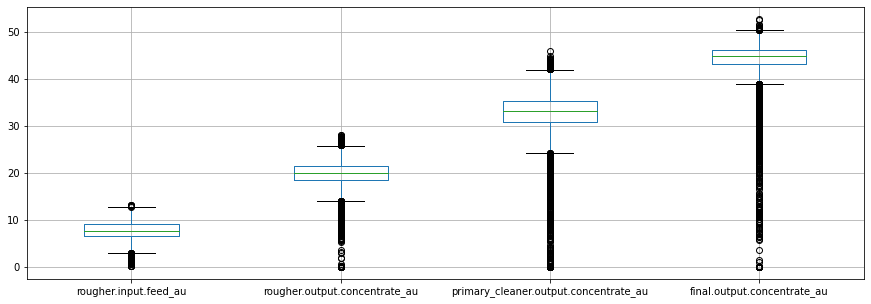

In [20]:
df_train.boxplot(col_au, figsize = (15,5))
plt.show()

<div class="alert alert-info">Концентрация представлена в процентах от общего сырья, по таблице и графику видим, что концентрация поэтапно растёт - от ~8 до ~45</div>

In [21]:
col_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
df_train[col_ag]

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
...,...,...,...,...
14144,6.091855,11.124896,6.559174,3.224920
14145,6.121323,11.425983,6.612376,3.195978
14146,5.970515,8.523497,7.128896,3.109998
14147,6.048130,11.658799,7.490444,3.367241


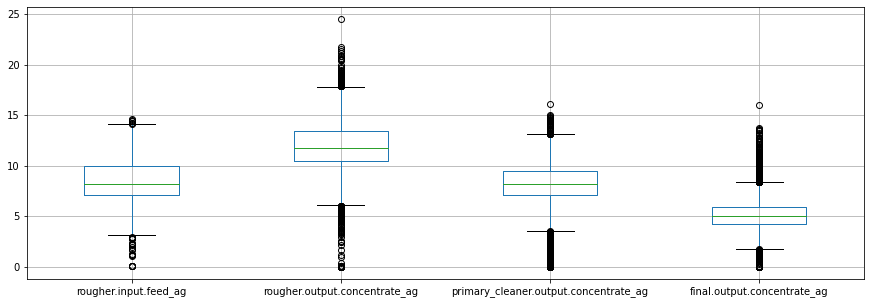

In [22]:
df_train.boxplot(col_ag, figsize = (15,5))
plt.show()

<div class="alert alert-info">Концентрация серебра после первого этапа очистки возрастает почти в два раза, затем на последующих этапах - падает, то есть сырьё очищается от примесей</div>

In [23]:
col_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
df_train[col_pb]

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
...,...,...,...,...
14144,4.617558,10.984003,12.445966,11.356233
14145,4.144989,10.888213,12.623947,11.349355
14146,4.020002,8.955135,12.633558,11.434366
14147,3.902537,10.655377,12.012378,11.625587


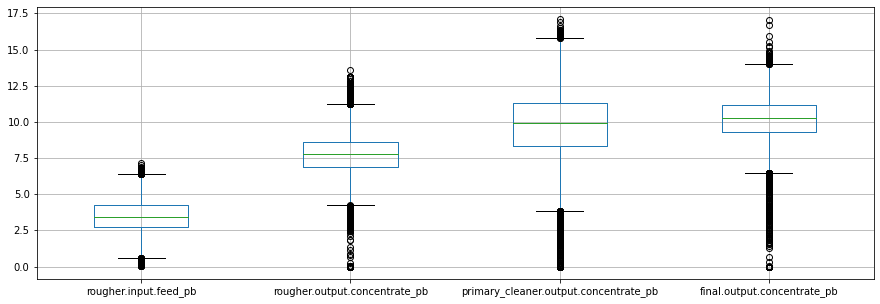

In [24]:
df_train.boxplot(col_pb, figsize = (15,5))
plt.show()

<div class="alert alert-info">Концентрация свинца вырастает за время обработки, возможно, полная очистка золота от свинца не так необходима</div>

<div class="alert alert-info">Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
</div>

In [25]:
df_train_feed_size = df_train.filter(like="feed_size")
df_train_feed_size.head()

,primary_cleaner.input.feed_size,rougher.input.feed_size
0,7.25,55.486599
1,7.25,57.278666
2,7.25,57.510649
3,7.25,57.792734
4,7.25,56.047189


In [26]:
df_test_feed_size = df_test.filter(like="feed_size")
df_test_feed_size.head()

,primary_cleaner.input.feed_size,rougher.input.feed_size
0,8.080000,62.710452
1,8.080000,61.961163
2,7.786667,66.903807
3,7.640000,59.865919
4,7.530000,63.315324


<div class="alert alert-info">
Построим kde plot и сравним распределения выборок, пересекаются ли значения из тестовой выборки со значениями из обучающей.</div>

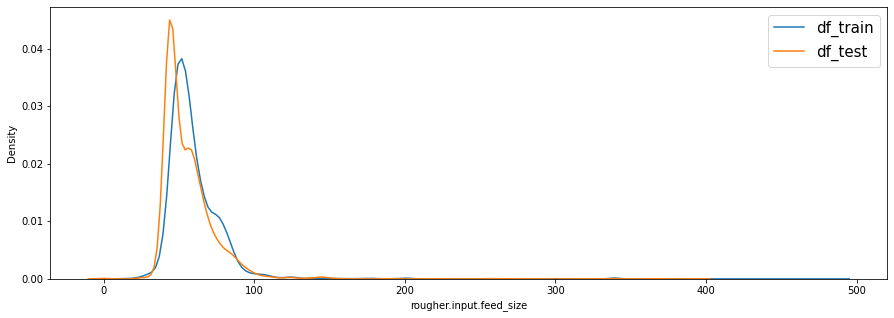

In [29]:
f, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(x='rougher.input.feed_size',
            label='df_train',
            data=df_train_feed_size);

sns.kdeplot(x='rougher.input.feed_size',
            label='df_test',
            data=df_test_feed_size);

plt.legend(fontsize = 15);

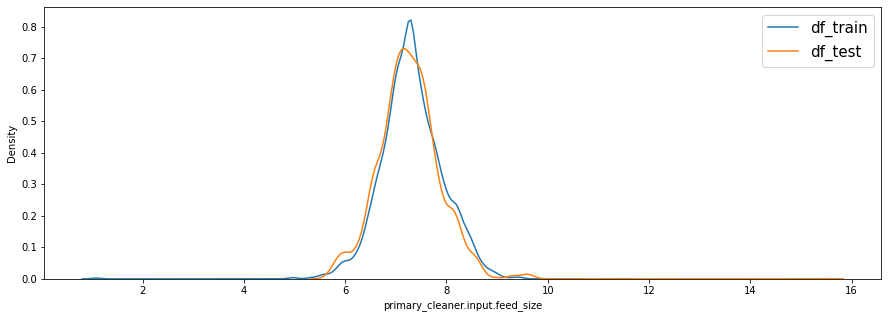

In [30]:
f, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(x='primary_cleaner.input.feed_size',
            label='df_train',
            data=df_train_feed_size);

sns.kdeplot(x='primary_cleaner.input.feed_size',
            label='df_test',
            data=df_test_feed_size);

plt.legend(fontsize = 15);

<div class="alert alert-info">Распределения похожи, в тестовой выборке размер гранул на входе чуть превышает размер в тренировочной, возможно, это уберется в дальнейшей обработке, на выходе после первой очистки всё отлично, выборки очень похожи</div>

<div class="alert alert-info">Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</div>

<div class="alert alert-info">Посмотрим на столбцы с концентрацией</div>

In [31]:
df_train.filter(like="concentrate").head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.calculation.sulfate_to_au_concentrate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,6.055403,9.889648,5.507324,42.192020,8.547551,10.389648,19.529297,34.174427,41885.707031,11.500771,7.101074,28.029297,19.793808
1,6.029369,9.968944,5.257781,42.701629,8.558743,10.497069,19.369147,34.118526,42050.861809,11.615865,7.278807,28.067063,20.050975
2,6.055926,10.213995,5.383759,42.657501,8.603505,10.354494,19.167579,33.969464,42018.101184,11.695753,7.216833,27.454037,19.737170
3,6.047977,9.977019,4.858634,42.689819,7.221879,8.496563,15.978538,28.260743,42029.447991,11.915047,7.175616,27.341277,19.320810
4,6.148599,10.142511,4.939416,42.774141,9.089428,9.986786,19.199864,33.044932,42125.354245,12.411054,7.240205,27.041023,19.216101


<div class="alert alert-info">Создадим новые столбцы с суммарной концентрацией</div>

In [32]:
df_train['sum_rougher'] = (df_train['rougher.output.concentrate_ag'] + 
                                       df_train['rougher.output.concentrate_pb'] +
                                      df_train['rougher.output.concentrate_sol'] +
                                      df_train['rougher.output.concentrate_au'])
df_train['sum_primary'] = (df_train['primary_cleaner.output.concentrate_ag'] + 
                                       df_train['primary_cleaner.output.concentrate_pb'] +
                                      df_train['primary_cleaner.output.concentrate_sol'] +
                                      df_train['primary_cleaner.output.concentrate_au'])
df_train['sum_final'] = (df_train['final.output.concentrate_ag'] + 
                                       df_train['final.output.concentrate_pb'] +
                                      df_train['final.output.concentrate_sol'] +
                                      df_train['final.output.concentrate_au'])
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher,sum_primary,sum_final
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667


<div class="alert alert-info">Построим график</div>

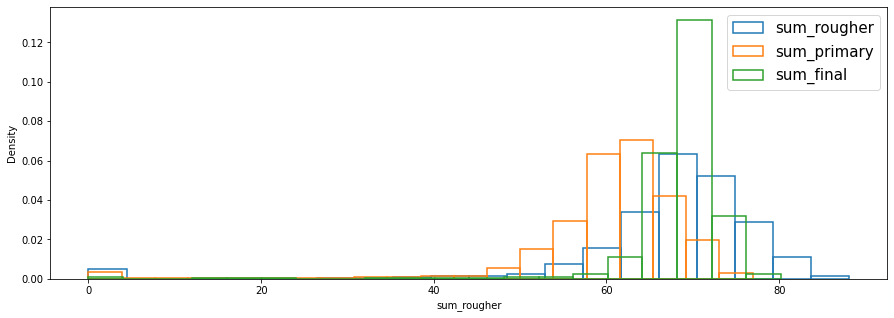

In [33]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='sum_rougher',
             label='sum_rougher',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

sns.histplot(x='sum_primary',
             label='sum_primary',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

sns.histplot(x='sum_final',
             label='sum_final',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

plt.legend(fontsize = 15);

<div class="alert alert-info">Найдем нулевые значения - аномалии, и удалим их.</div>

In [34]:
df_train = df_train.loc[(df_train['sum_rougher'] > 0.05)&
                        (df_train['sum_primary'] > 0.05)&
                        (df_train['sum_final'] > 0.05)]
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher,sum_primary,sum_final
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,70.781325,59.001692,68.098589
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,70.539603,59.703912,68.274362
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,55.376330,59.561096,68.226068
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,69.201689,57.216686,68.200449


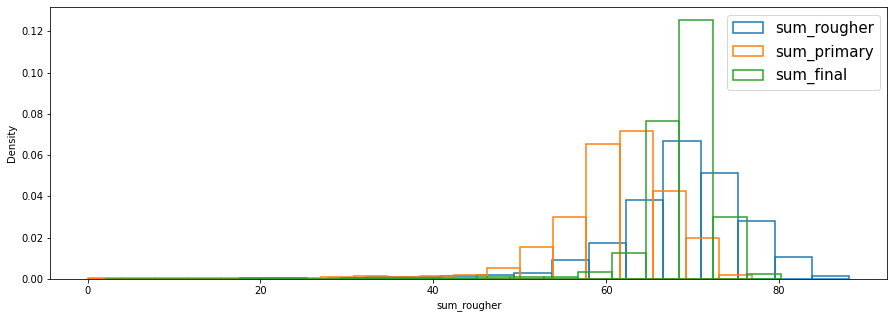

In [35]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='sum_rougher',
             label='sum_rougher',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

sns.histplot(x='sum_primary',
             label='sum_primary',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

sns.histplot(x='sum_final',
             label='sum_final',
             stat="density",
             bins=20,
             fill=False,
             data=df_train)

plt.legend(fontsize = 15);

In [36]:
(14149 - 13602)*100/14149

3.8659975970033216

<div class="alert alert-info">Осталось 13602 строки, удалили менее 4% данных</div>

In [37]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

<div class="alert alert-info">В тестовой выборке не так много пропусков, удалим их</div>

In [38]:
df_test = df_test.dropna()
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

<div class="alert alert-info">
Построила гистограммы, проверила, что нулевые значения убрались</div>

<div class="alert alert-info">
Рассмотрим также исходное сырьё (это надо было сделать сначала-))</div>

In [39]:
df_input = df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
df_input

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol
0,6.486150,6.100378,2.284912,36.808594
1,6.478583,6.161113,2.266033,35.753385
2,6.362222,6.116455,2.159622,35.971630
3,6.118189,6.043309,2.037807,36.862241
4,5.663707,6.060915,1.786875,34.347666
...,...,...,...,...
14144,5.335862,6.091855,4.617558,37.369774
14145,4.838619,6.121323,4.144989,38.591551
14146,4.525061,5.970515,4.020002,40.074026
14147,4.362781,6.048130,3.902537,39.713906


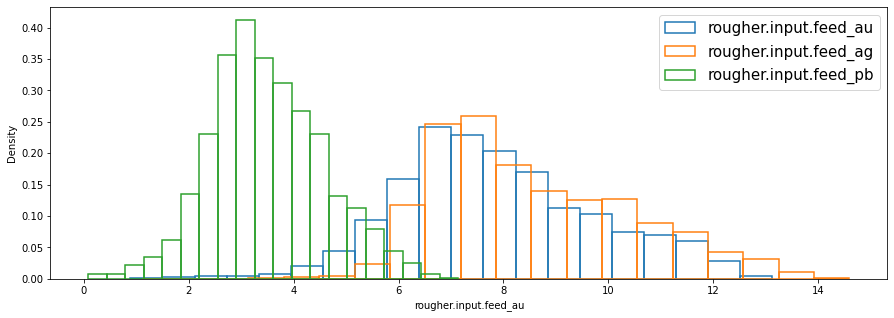

In [40]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='rougher.input.feed_au',
             label='rougher.input.feed_au',
             stat="density",
             bins=20,
             fill=False,
             data=df_input)

sns.histplot(x='rougher.input.feed_ag',
             label='rougher.input.feed_ag',
             stat="density",
             bins=20,
             fill=False,
             data=df_input)

sns.histplot(x='rougher.input.feed_pb',
             label='rougher.input.feed_pb',
             stat="density",
             bins=20,
             fill=False,
             data=df_input)

plt.legend(fontsize = 15);

In [41]:
df_input['sum_input'] = (df_input['rougher.input.feed_au'] +
                         df_input['rougher.input.feed_ag'] +
                         df_input['rougher.input.feed_pb'] +
                         df_input['rougher.input.feed_sol'])
df_input.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,sum_input
0,6.486150,6.100378,2.284912,36.808594,51.680034
1,6.478583,6.161113,2.266033,35.753385,50.659114
2,6.362222,6.116455,2.159622,35.971630,50.609929
3,6.118189,6.043309,2.037807,36.862241,51.061546
4,5.663707,6.060915,1.786875,34.347666,47.859163


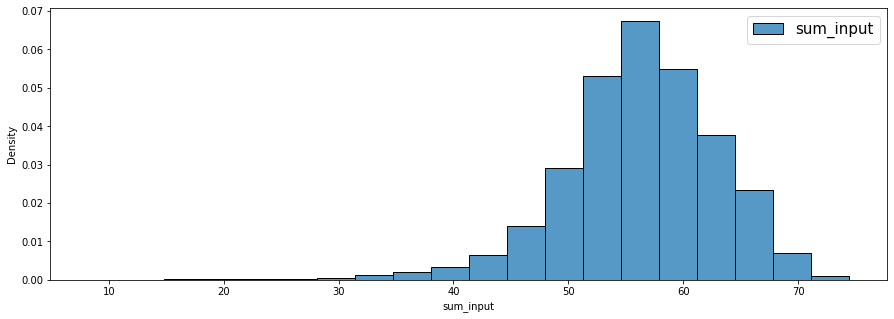

In [42]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='sum_input',
             label='sum_input',
             stat="density",
             bins=20,
             data=df_input)

plt.legend(fontsize = 15);

<div class="alert alert-info">
    По графику видно, что распределение похоже на нормальное со скосом влево, нулевых значений нет
</div>

## Модель

<div class="alert alert-info">Из исходных данных нужно взять колонки с целевыми признаками и добавить их в тестовую выборку, так как их там нет (rougher.output.recovery и final.output.recovery), а затем из тренировочной убрать все колонки, которых нет в тестовой выборке</div>

In [43]:
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery', 'date']], on ='date', how='left') 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5228
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  primary_clea

In [44]:
set_difference = set(df_train.columns).symmetric_difference(set(df_test.columns))
set_difference

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [45]:
df_train = df_train.drop(columns=set_difference)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13602 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13602 non-null  object 
 1   final.output.recovery                       13602 non-null  float64
 2   primary_cleaner.input.sulfate               13602 non-null  float64
 3   primary_cleaner.input.depressant            13602 non-null  float64
 4   primary_cleaner.input.feed_size             13602 non-null  float64
 5   primary_cleaner.input.xanthate              13602 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      13602 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    13602 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      13602 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    13602 non-null  float64
 10  primary_cl

<div class="alert alert-info">Напишем функцию для вычисления итоговой sMAPE.</div>

In [46]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = abs((y_true + y_pred))/2 + 0.000000001
    result = (error / scale).mean()
    return result * 100 

<div class="alert alert-info">Это sMAPE, а итоговая будет выглядеть так: 0,25*sMAPE_01  + 0,75*sMAPE_02</div>

In [47]:
def smape_fin (x,y):
    fin = 0.25*x + 0.75*y
    return fin

<div class="alert alert-info">Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.</div>

<div class="alert alert-info">
Создадим переменные <b>features</b> (все столбцы, кроме целевого) и <b>target</b> (целевой столбец) для каждой выборки.
</div

In [48]:
features_train = df_train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [49]:
features_test = df_test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']

features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [50]:
scorer = make_scorer(smape, greater_is_better = False)

<div class="alert alert-info">
Рассмотрим линейную регрессию
</div

In [52]:
model_regr = LinearRegression()

scores = cross_val_score(model_regr, features_train, target_rougher_train, scoring = scorer, cv=5)

smape_rougher_regr = np.abs(scores.mean())

print ('sMAPE_rougher линейной регрессии:', smape_rougher_regr)

sMAPE_rougher линейной регрессии: 7.27691969103793


In [57]:
model_regr = LinearRegression()

scores = cross_val_score(model_regr, features_train, target_final_train, scoring = scorer, cv=5)

smape_final_regr = np.abs(scores.mean())

print ('sMAPE_final линейной регрессии:', smape_final_regr)

sMAPE_final линейной регрессии: 11.013214442951051


<div class="alert alert-info">
Теперь рассмотрим дерево решений 
</div

<div class="alert alert-info">
Дерево решений rougher</div

In [58]:
smape_rougher_tree = 100
for i in range(1,11):
    model = DecisionTreeRegressor(random_state=12345, max_depth = i)
    #model.fit(features_train, target_rougher_train)
    #predictions_test = model.predict(features_test)
    scores = cross_val_score(model, features_train, target_rougher_train, scoring=scorer, cv=5)
    score_tree_r = np.abs(scores.mean())
    if score_tree_r < smape_rougher_tree:
        smape_rougher_tree = score_tree_r
        best_depth_tree_r = i
    #print ('max_depth =', i, ':', score_tree_r)
    #smape_rougher_tree = smape (target_rougher_test, predictions_test)
print ('best_max_depth=', best_depth_tree_r, ':','sMAPE_rougher дерева решений:', smape_rougher_tree)

best_max_depth= 3 : sMAPE_rougher дерева решений: 6.815757453460546


<div class="alert alert-info">
Дерево решений final</div

In [59]:
smape_final_tree = 100
for i in range(1,11):
    model = DecisionTreeRegressor(random_state=12345, max_depth = i)
    #model.fit(features_train, target_final_train)
    #predictions_test = model.predict(features_test)
    scores = cross_val_score(model, features_train, target_final_train, scoring = scorer, cv=5)
    score_tree_f = np.abs(scores.mean())
    if score_tree_f < smape_final_tree:
        smape_final_tree = score_tree_f
        best_depth_tree_f = i
    #print ('max_depth =', i, ':', score_tree_f)
    #smape_rougher_tree = smape (target_rougher_test, predictions_test)
print ('best_max_depth=', best_depth_tree_f, ':','sMAPE_final дерева решений:', smape_final_tree)

best_max_depth= 3 : sMAPE_final дерева решений: 9.237775815879804


<div class="alert alert-info">
Случайный лес rougher</div

In [62]:
smape_rougher_forest = 100
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 6):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth = depth, n_jobs=-1)
        #model.fit(features_train, target_rougher_train)
        #predictions_test = model.predict(features_test)
        scores = cross_val_score(model, features_train, target_rougher_train, scoring=scorer, cv=5)
        score_forest_r = np.abs(scores.mean())
        if score_forest_r < smape_rougher_forest:
            smape_rougher_forest = score_forest_r
            best_est_r = est
            best_depth_forest_r = depth
    #smape_rougher_forest = smape (target_final_test, predictions_test)
print('sMAPE_rougher случайного леса:', smape_rougher_forest, "Количество деревьев:", best_est_r, "Максимальная глубина:", best_depth_forest_r)

sMAPE_rougher случайного леса: 6.306789911766995 Количество деревьев: 50 Максимальная глубина: 5


sMAPE_rougher случайного леса: 6.306789911766995 Количество деревьев: 50 Максимальная глубина: 5

<div class="alert alert-info">
Случайный лес final</div

In [64]:
smape_final_forest = 100
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 6):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth = depth, n_jobs=-1)
        #model.fit(features_train, target_final_train)
        #predictions_test = model.predict(features_test)
        scores = cross_val_score(model, features_train, target_final_train, scoring=scorer, cv=5)
        score_forest_f = np.abs(scores.mean())
        if score_forest_f < smape_final_forest:
            smape_final_forest = score_forest_f
            best_est_f = est
            best_depth_forest_f = depth
    #smape_rougher_forest = smape (target_final_test, predictions_test)
print('sMAPE_final случайного леса:', smape_final_forest, "Количество деревьев:", best_est_f, "Максимальная глубина:", best_depth_forest_f)

sMAPE_final случайного леса: 8.875016817795236 Количество деревьев: 50 Максимальная глубина: 5


sMAPE_final случайного леса: 8.875016817795236 Количество деревьев: 50 Максимальная глубина: 5

<div class="alert alert-info">
Выведем все sMAPE</div

In [66]:
print ('sMAPE_rougher линейной регрессии:', smape_rougher_regr)
print ('sMAPE_final линейной регрессии:', smape_final_regr)
print ()
print ('sMAPE_rougher дерева решений:', smape_rougher_tree, best_depth_tree_r)
print ('sMAPE_final дерева решений:', smape_final_tree, best_depth_tree_f)
print ()
print ('sMAPE_rougher случайного леса:', smape_rougher_forest, best_est_r, best_depth_forest_r)
print ('sMAPE_final случайного леса:', smape_final_forest, best_est_f, best_depth_forest_f)


sMAPE_rougher линейной регрессии: 7.27691969103793
sMAPE_final линейной регрессии: 11.013214442951051

sMAPE_rougher дерева решений: 6.815757453460546 3
sMAPE_final дерева решений: 9.237775815879804 3

sMAPE_rougher случайного леса: 6.306789911766995 50 5
sMAPE_final случайного леса: 8.875016817795236 50 5


<div class="alert alert-info">
Для черновой очистки лучший результат показал случайный лес с параметрами n_estimators=50 , max_depth=5
<br>
    <br>
Для финальной очистки лучший результат также показал случайный лес с параметрами n_estimators=50 , max_depth=5
<br>

<div class="alert alert-info">
Проверим на тестовой выборке модель случайного леса для черновой очистки</div

In [67]:
print ('sMAPE_rougher случайного леса:', smape_rougher_forest)
model = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=1)
model.fit(features_train, target_rougher_train) 
predicted_test = model.predict(features_test)
smape_r = smape(target_rougher_test, predicted_test)
print ('sMAPE_rougher на тестовой выборке:', smape_r)


sMAPE_rougher случайного леса: 6.306789911766995
sMAPE_rougher на тестовой выборке: 8.633477713358714


<div class="alert alert-info">
Проверим на тестовой выборке модель дерева решений для финальной очистки</div

In [68]:
print ('sMAPE_final случайного леса:', smape_final_forest)
model = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=1)
model.fit(features_train, target_final_train) 
predicted_test = model.predict(features_test)
smape_f = smape(target_final_test, predicted_test)
print ('sMAPE_rougher на тестовой выборке:', smape_f)

sMAPE_final случайного леса: 8.875016817795236
sMAPE_rougher на тестовой выборке: 9.05204218820306


<div class="alert alert-info">
Создадим константную модель, проверим модели
</div

In [69]:
dummy_clf = DummyRegressor(strategy="mean")
dummy_clf.fit(features_train, target_rougher_train)
predicted_test = dummy_clf.predict(features_test) 
result_test = smape(target_rougher_test, predicted_test)
print('Точность константной модели rougher:', result_test)

Точность константной модели rougher: 8.92526770063527


In [70]:
dummy_clf = DummyRegressor(strategy="mean")
dummy_clf.fit(features_train, target_final_train)
predicted_test = dummy_clf.predict(features_test) 
result_test = smape(target_final_test, predicted_test)
print('Точность константной модели final:', result_test)

Точность константной модели final: 9.570682671405836


<div class="alert alert-info">
Константная модель проигрывает, из чего делаем вывод, что наши модели подходят</div

<div class="alert alert-info">
Посчитаем финальную sMAPE</div

In [71]:
smape_fin = smape_fin(smape_r, smape_f)
smape_fin

8.947401069491974

<div class="alert alert-info">
Финальная sMAPE рассчитана исходя из лучших значений промежуточных sMAPE нескольких моделй</div

<div class="alert alert-info">
Вывод
<br>
Была задача найти наиболее подходящую модель для расчета sMAPE двух величин - 
эффективности обогащения чернового концентрата rougher.output.recovery и эффективности обогащения финального концентрата final.output.recovery.
<br>
Была проведена предобработка данных, удалены аномалии и пропущенные значения.
    <br>
Проанализированы данные, построены графики.
    <br>
Рассмотрено, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, исследовано распределение размеров гранул сырья на обучающей и тестовой выборках, исследована суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
    <br>
Данные уже были разделены на обучающую и тестовую выборку, их мы разделили на выборки с целевым признаком и нужными признаками.
   <br>
Написана функция для промежуточной и итоговой sMAPE
       <br>
Написан скорер, который был передан в параметры cross_val_score(), для исследования нескольких моделей регрессии.
       <br>
Были выбраны лучшие модели для процесса черновой очистки, и для процесса финишной очистки, которая выдала наименьшее значение этой метрики 
    <br>
Для двух лучших моделей сделаны предсказания по тестовой выборке. 
    <br>
В функцию smape переданы эти предсказания и ответы, получены sMAPE для чернового и финишного этапа. 
    <br>
Рассчитана итоговое sMAPE
</div